# 의사결정나무(Decision Tree)
## 의사결정나무 모형
1. 일련의 독립변수들을 활용하여 분류를 하거나 예측을 수행하는 기법
2. 최종 결과물이 "일련의 규칙들"로 표현됨
3. Decision Trees 또는 Trees라고 불림

## 의사결정나무의 2가지 기본 아이디어
1. 반복적 분할(Recursive partitioning)
    1. 레코드들을 두 부분으로 반복해서 잘라 세분된 영역 내의 동질성이 최대가 되도록 함
    2. 계속 잘라나가다 보면 모든 학습용 데이터를 100% 정확하게 분류해낼 수 있음(세분화)
2. 가지치기(Pruning the tree)
    1. 반복적 분할을 반복하다 보면 과적합화 발생
    2. 과적합화를 해결하기 위해 불필요한 가지(정보 제공이 많지 않은 가지)를 제거함으로써 나무를 단순화하는 작업이 이루어짐
3. 단점 : 과적합화 문제
4. 과적합 해소 방법
    1. 가지치기(Pruning) : 적당한 수준에서 나무의 성장을 중단시킴
    2. 랜덤 포레스트 : 여러개의 의사결정나무 모델 중에서 최적의 모델 선택

### [실습] 의사결정나무 - Moons 데이터셋

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3) #noise: 표준편차

In [11]:
# 학습용, 테스트용 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [12]:
#의사결정나무
from sklearn.tree import DecisionTreeClassifier
#모델 선언
model = DecisionTreeClassifier(random_state=2, max_depth=3, criterion='entropy')
#모델 학습
model.fit(X_train, y_train)

print("학습용:", model.score(X_train, y_train))
print("검증용:", model.score(X_test, y_test))

학습용: 0.9066666666666666
검증용: 0.92


[Text(0.4090909090909091, 0.875, 'X[1] <= 0.06\nentropy = 1.0\nsamples = 75\nvalue = [37, 38]'),
 Text(0.18181818181818182, 0.625, 'X[0] <= -0.617\nentropy = 0.242\nsamples = 25\nvalue = [1, 24]'),
 Text(0.09090909090909091, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.375, 'entropy = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.6363636363636364, 0.625, 'X[0] <= 1.166\nentropy = 0.855\nsamples = 50\nvalue = [36, 14]'),
 Text(0.45454545454545453, 0.375, 'X[0] <= -0.15\nentropy = 0.601\nsamples = 41\nvalue = [35, 6]'),
 Text(0.36363636363636365, 0.125, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.5454545454545454, 0.125, 'entropy = 0.795\nsamples = 25\nvalue = [19, 6]'),
 Text(0.8181818181818182, 0.375, 'X[0] <= 1.672\nentropy = 0.503\nsamples = 9\nvalue = [1, 8]'),
 Text(0.7272727272727273, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.9090909090909091, 0.125, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]')]

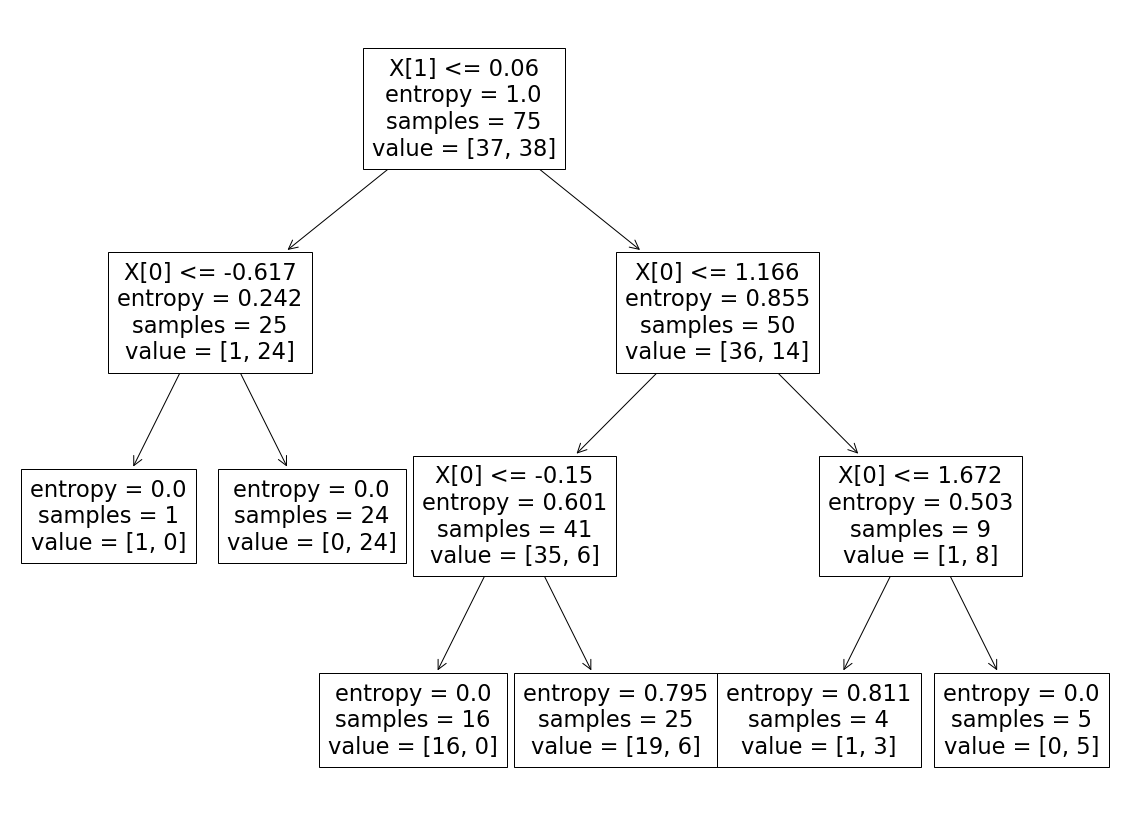

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(model)

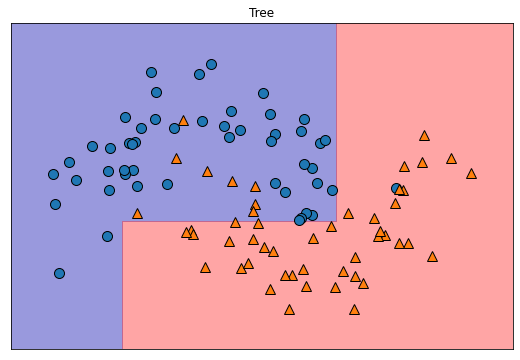

In [17]:
import matplotlib.pyplot as plt
import mglearn

plt.figure(figsize=(9,6))
plt.title("Tree")

#class 구분면
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.4)

#산점도
mglearn.discrete_scatter(X[:,0], X[:,1], y)

## Entroy & Gini
1. 엔트로피(Entropy)
    - 개념 : 랜덤 변수에 관한 정보를 계산하는 것을 '정보 엔트로피' 또는 '엔트로피'라고 함
    - 범위 : 0.0 ~ 1.0
    - 방식 : 각 사건의 확률에 관한 로그에 각 사건의 확률을 곱한 값의 합계의 음수
        - 엔트로피 0.0 (100% 순도) : A 영역에 속한 모든 샘플이 동일한 범주에 속할 경우(불확실성 최소, 순도 최대)
        - 엔트로피 1.0 (불순도 100%) : 클래스별로 균등하게 분포(불확실성 최대, 순도 최소) 
2. 지니계수(Gini Index)
    - 개념 : 집합에 이질적인 것이 얼마나 섞였는지를 측정하는 지표
    - 범위 : 0.0 ~ 0.5
    - 지니계수 0.0(100% 순도) : 지니계수가 작을수록 분류 잘된 것(불확실성 최소, 순도 최대)
    - 지니계수 0.5 : 클래스별로 균등하게 분포(불확실성 최대, 순도 최소)
    - 장점 : 로그를 계산할 필요가 없어서 엔트로피보다 구현 성능이 우수함
3. 확률과 정보량
    - 확률 : p
    - 정보량 : ceil(h) = ceil(-log2(p))
    - 확률 ⬆️ = 정보량 ⬇️

Text(0, 0.5, 'Information')

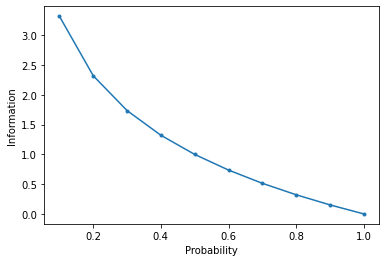

In [18]:
# 확률과 엔트로피
import numpy as np
from math import log2
from matplotlib import pyplot as plt

# 확률
probs = np.arange(0.1, 1.1, 0.1)
# 정보량 계산
info = [-log2(p) for p in probs]

plt.plot(probs, info, marker='.')
plt.xlabel('Probability')
plt.ylabel('Information')

In [19]:
# 주사위 던지기 엔트로피 계산
from math import log2

#경우의 수
n = 6

# 확률
p = 1.0 / n

# 엔트로피 공식
entropy = -sum([p * log2(p) for _ in range(n)])

print(entropy) #비트

2.584962500721156


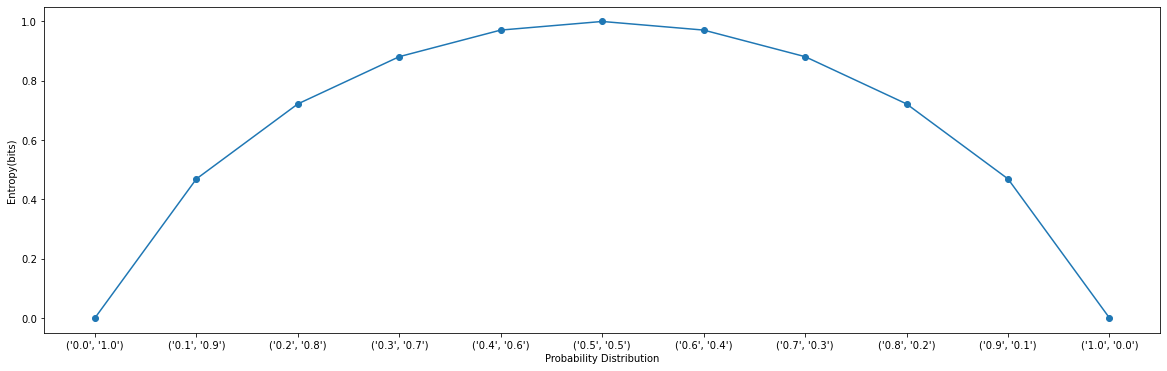

In [21]:
# 엔트로피
from math import log2
import matplotlib.pyplot as plt 

def entropy(events):
    return -sum([p*log2(p+ 1e-15) for p in events])

# 확률
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# 확률분포
dists = [[p, 1-p] for p in probs]
# 각 분포에 관한 엔트로피 계산
ents = [entropy(d) for d in dists]
# 확률분포와 엔트로피 그래프
plt.figure(figsize=(20, 6))
plt.plot(probs, ents, marker='o')

xnum=[]
for d in dists:
    dd = (str(d[0]), '{:.1f}'.format(d[1]))
    xnum.append(dd)

plt.xticks(probs, xnum)
plt.xlabel('Probability Distribution') #확률분포
plt.ylabel('Entropy(bits)') #엔트로피
plt.show()

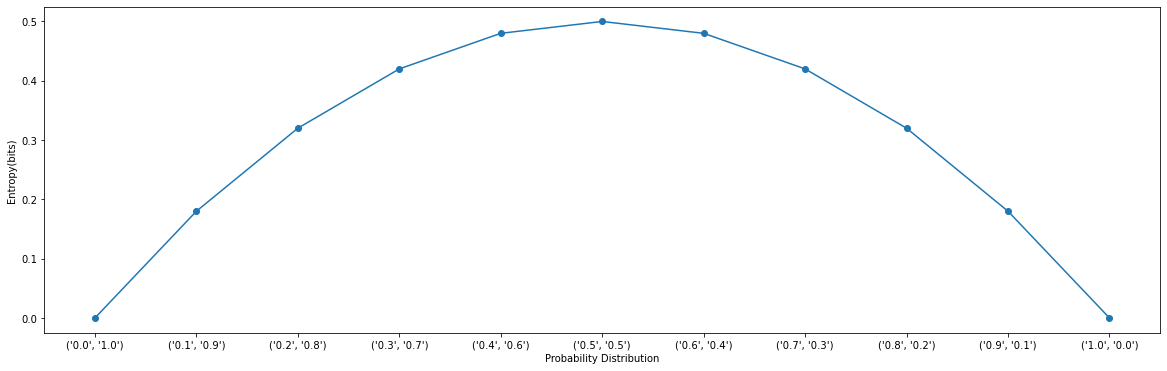

In [22]:
# 지니계수
%matplotlib inline
from math import log2
from matplotlib import pyplot

def gini2(events):
    return sum([p * (1-p) for p in events])

# 확률
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# 확률분포
dists = [[p, 1-p] for p in probs]
# 각 분포에 관한 엔트로피 계산
ents = [gini2(d) for d in dists]
# 확률분포와 엔트로피 그래프
plt.figure(figsize=(20, 6))
plt.plot(probs, ents, marker='o')

xnum=[]
for d in dists:
    dd = (str(d[0]), '{:.1f}'.format(d[1]))
    xnum.append(dd)

plt.xticks(probs, xnum)
plt.xlabel('Probability Distribution') #확률분포
plt.ylabel('Entropy(bits)') #엔트로피
plt.show()


### 랜덤포레스트 지표
- splitter
    - 각 노드에서 분할을 선택하는데 사용된 전략
    - splitter='best'
        * 최상의 분할을 선택하는 방식 (for 랜덤포레스트)
    - splitter='random'
        * 무작위 분할을 선택하는 방식 (for 엑스트라트리)

In [ ]:
#의사결정나무 모형 생성
from sklearn.tree import DecisionTreeClassifier

#트리 모형 생성(기본옵션)
model1 = DecisionTreeClassifier(splitter='best', random_state=0)
model1.fit(X_train, y_train)

